In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

In [ ]:
### v3.0 

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size of EfficientNet
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

def pil_loader(path):
    return Image.open(path).convert('RGB')

print("Here we go... Loading the dataset")
# full_dataset = datasets.DatasetFolder('/data/datasets/community/deeplearning/imagenet/train', loader=pil_loader, extensions=('.jpeg', '.png', '.jpg'), transform=transform)
full_dataset = datasets.ImageFolder('/data/datasets/community/deeplearning/imagenet/train', transform=transform)

print("So it looks like we somehow managed to load this God-forsaken dataset")
print("So yeah, congratulations!!!!!")

/home/gdamoda1/.conda/envs/eee598/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/gdamoda1/.conda/envs/eee598/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Here we go... Loading the dataset


In [18]:
from torch.utils.data import DataLoader, random_split

total_size = len(full_dataset)
test_size = int(0.05 * total_size)
val_size = int(0.05 * total_size)
train_size = total_size - test_size - val_size

# Perform the split
train_dataset, test_dataset, val_dataset = random_split(full_dataset, [train_size, test_size, val_size])

# Create DataLoaders
batch_size = 128  # You can adjust this value based on your needs
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8)


print(f"Total dataset size: {total_size}")
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

Total dataset size: 832571
Train dataset size: 749315
Test dataset size: 41628
Number of batches in train loader: 5855
Number of batches in test loader: 326


In [23]:
#CREATING THE SUBSET

from collections import defaultdict
import numpy as np

import torch

# Let's print out one image from this set
# img, label = dataset[random.randint(0, len(dataset._labels))]
# print(type(img))
# plt.imshow(img)
# plt.title(f"{label_dict[label]}")
# plt.axis("off")
# plt.show()
# print(img.size)

# Figuring out the number of images per class over here
class_count = len(full_dataset.classes)
subset_count = defaultdict(int)
for label in full_dataset.classes:
    subset_count[label] = 0

print(f"Number of classes: {class_count}")

### Breaking down your dataset into the subset dataset
# let's randomly sample the dataset and maybe create like 10 images from each of
# the 1000 classes so like 10000 images and make that our subset and check
# memory performance

img_per_class = 30
max_limit = 19500
count = 0

def create_balanced_subset(dataset, img_per_class, exclude_indices=None):
    labels = np.array(dataset.targets)
    classes = np.unique(labels)
    samples_per_class = img_per_class
    
    subset_indices = []
    for c in classes:
        class_indices = np.where(labels == c)[0]
        if exclude_indices is not None:
            class_indices = np.setdiff1d(class_indices, exclude_indices)
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        subset_indices.extend(selected_indices)
    
    return subset_indices

# Create balanced subsets
train_indices = create_balanced_subset(full_dataset, img_per_class)
val_indices = create_balanced_subset(full_dataset, 30, exclude_indices=train_indices)
test_indices = create_balanced_subset(full_dataset, 30, exclude_indices=np.concatenate([train_indices, val_indices]))


# this is the subset of data we have now
train_subset = torch.utils.data.Subset(full_dataset, train_indices)
val_subset = torch.utils.data.Subset(full_dataset, val_indices)
test_subset = torch.utils.data.Subset(full_dataset, test_indices)

# Create DataLoaders
batch_size = 64
num_workers = 8

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print(f"Yes, we finally created this bit, now onto failing the next stage")


Number of classes: 650
Yes, we finally created this bit, now onto failing the next stage


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02119789 1 kit_fox

n02100735 2 English_setter

n02110185 3 Siberian_husky

n02096294 4 Australian_terrier

n02102040 5 English_springer

n02066245 6 grey_whale

n02509815 7 lesser_panda

n02124075 8 Egyptian_cat

n02417914 9 ibex

n02123394 10 Persian_cat

n02125311 11 cougar

n02423022 12 gazelle

n02346627 13 porcupine

n02077923 14 sea_lion

n02110063 15 malamute

n02447366 16 badger

n02109047 17 Great_Dane

n02089867 18 Walker_hound

n02102177 19 Welsh_springer_spaniel

n02091134 20 whippet

n02092002 21 Scottish_deerhound

n02071294 22 killer_whale

n02442845 23 mink

n02504458 24 African_elephant

n02092339 25 Weimaraner

n02098105 26 soft-coated_wheaten_terrier

n02096437 27 Dandie_Dinmont

n02114712 28 red_wolf

n02105641 29 Old_English_sheepdog

n02128925 30 jaguar

n02091635 31 otterhound

n02088466 32 bloodhound

n02096051 33 Airedale

n02117135 34 hyena

n02138441 35 meerkat

n02097130 36 giant_schnauzer

n02493509 37 titi

n02457408 38 three-toed_sloth

n02389026 39 sor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


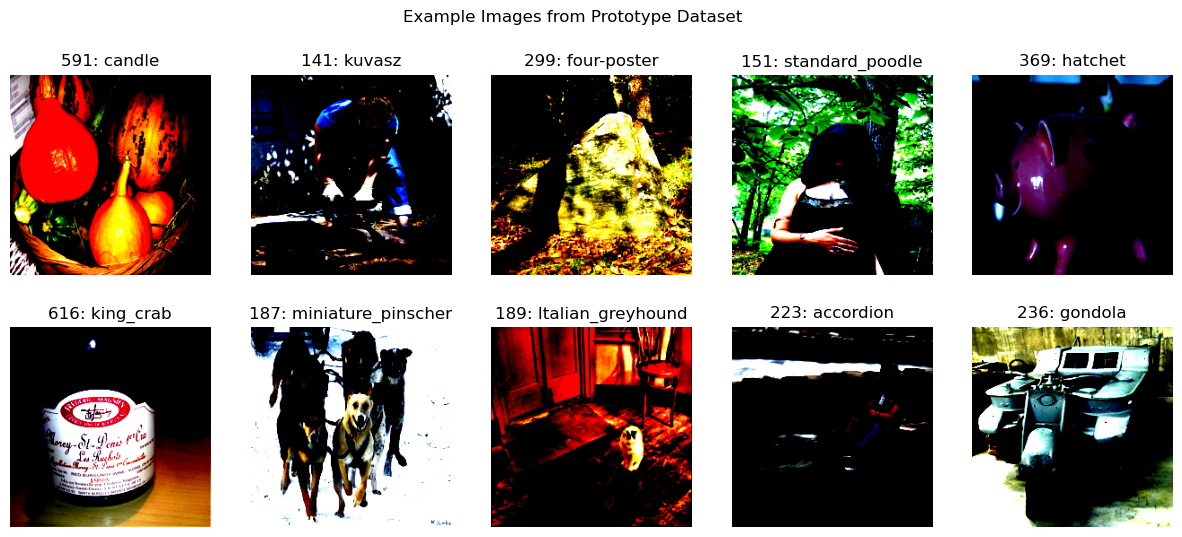

In [17]:
# Visualization of Class Distribution
def visualize_class_distribution(dataset, title):
    labels = np.array(dataset.dataset.targets)  # Get targets from the original dataset
    unique, counts = np.unique(labels, return_counts=True)  # Count occurrences of each class
    class_distribution = dict(zip(unique, counts))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(list(class_distribution.keys()), list(class_distribution.values()), color='skyblue')
    plt.xlabel('Number of Images')
    plt.title(f'{title} Class Distribution')
    plt.xlim(0, max(class_distribution.values()) + 10)  # Adjust x-axis limit
    plt.gca().invert_yaxis()  # Invert y-axis to have the first class on top
    plt.show()

# Visualize class distribution for the training set
# visualize_class_distribution(train_subset, 'Training Set')

# Visualize class distribution for the validation set
# visualize_class_distribution(val_subset, 'Validation Set')

file = open("/home/gdamoda1/map_imagenet.txt")
imagenet_map = {}
for line in file:
    print(line)
    line = line.strip()
    line = line.split(" ")
    imagenet_map[line[1]] = line[2]

# print(imagenet_map)

# Example Images Visualization
def visualize_example_images(dataset, num_images=10):
    example_images = random.sample(range(len(dataset)), num_images)  # Randomly select indices
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(example_images):
        img, label = dataset[idx]  # Get the image and label
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.permute(1, 2, 0))  # Convert from CxHxW to HxWxC for display
        plt.title(f'{label}: {imagenet_map[str(label)]}')
        plt.axis('off')
    plt.suptitle('Example Images from Prototype Dataset')
    plt.show()

# Show example images from the training set
visualize_example_images(train_subset, num_images=10)

In [31]:
############# STAT CHECK ########################################

len(train_subset.indices)

19500

In [ ]:
# SO DO WE ACTUALLY NEED THIS.... MAYBE THE IMAGENET MAPPING PART
# APART FROM THAT I DON'T THINK SO....


import os
import random
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
from PIL import Image
import torch
from collections import defaultdict


file = open("/home/gdamoda1/map_imagenet.txt")
imagenet_map = {}
for line in file:
    line = line.strip()
    line = line.split(" ")
    imagenet_map[line[0]] = line[2]

# Define the transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the input size of EfficientNet
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization   
])

# Specify the directory where the ImageNet dataset is located
root_dir = '/data/datasets/community/deeplearning/imagenet/train'

# Set up some parameters for the subset
img_per_class = 10  # Number of images per class
max_limit = 10000   # Max number of images for the subset

# Initialize lists for storing the image paths and labels
subset_paths = []
subset_labels = []

# Step 1: Access folders at the file level
classes = sorted(os.listdir(root_dir))  # List of class folders

print("MARKER: Accessing folders...")

for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(root_dir, class_name)
    
    # Get the list of all images in the class folder
    class_images = os.listdir(class_dir)
    
    # Randomly select `img_per_class` images from this class
    selected_images = random.sample(class_images, min(len(class_images), img_per_class))
    
    # Store the selected image paths and their corresponding labels (class indices)
    for img_name in selected_images:
        img_path = os.path.join(class_dir, img_name)
        subset_paths.append(img_path)
        subset_labels.append(class_index)
        
    if len(subset_paths) >= max_limit:
        break

# Step 2: Define a custom dataset to load images from paths
class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')  # Load image
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# Step 3: Create the dataset and a DataLoader
subset_dataset = CustomImageDataset(subset_paths, subset_labels, transform=transform)
subset_loader = DataLoader(subset_dataset, batch_size=64, shuffle=True, num_workers=8)

print("MARKER: Subset created and ready for loading...")

# Example: Visualize a random image from the subset
import matplotlib.pyplot as plt

img, label = subset_dataset[random.randint(0, len(subset_dataset) - 1)]
plt.imshow(img.permute(1, 2, 0))  # Rearrange tensor dimensions for plotting
plt.title(f"Class {imagenet_map[classes[label]]}")
plt.axis("off")
plt.show()

print("MARKER: Image displayed...")



In [ ]:
del subset_dataset, subset_loader

In [4]:
##############################################
#           THE RESNET - BUILDER
##############################################

import torch
import torch.nn as nn
from torchvision import datasets, transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None, activation=nn.ReLU()):
        super(ResidualBlock, self).__init__()
        self.activation = activation
        
        # First convolution: Can apply stride > 1 for downsampling
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(out_channels),
            self.activation
        )
        
        # Second convolution: Stride should always be 1 to preserve spatial dimensions
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels)
        )
        
        # Handle downsampling
        self.downsample = downsample

    def forward(self, x):
        residual = x
        
        # Apply the first and second convolutions
        out = self.conv1(x)
        out = self.conv2(out)
        
        # Downsample the input if required
        if self.downsample:
            residual = self.downsample(x)
        
        # Add the residual to the output
        out += residual
        
        # Apply activation
        out = self.activation(out)
        
        return out



class ResNet(nn.Module):
    def __init__(self, resBlock, layerSize, outputNodes=1000, activation=nn.ReLU()):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.activation = activation
        self.input_layer = nn.Sequential(
            #Input = 3 (RGB)
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(num_features=64),
            self.activation
        )
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(resBlock, 64, layerSize[0], stride = 1)
        self.layer1 = self._make_layer(resBlock, 128, layerSize[1], stride = 2)
        self.layer2 = self._make_layer(resBlock, 256, layerSize[2], stride = 2)
        self.layer3 = self._make_layer(resBlock, 512, layerSize[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc_layer = nn.Linear(512, outputNodes)

    def _make_layer(self, resBlock, planes, layerSize, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(resBlock(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, layerSize):
            # layers.append(resBlock(self.inplanes, planes, stride=1, downsample=downsample))
            layers.append(resBlock(planes, planes))
        
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)

        # making it compatible to a FC-layer
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)

        return x

In [32]:
import tqdm
import time

num_classes = len(train_subset.classes)
model = ResNet(ResidualBlock, [3, 4, 6, 3], outputNodes=1000)
model = torch.nn.DataParallel(model)
model = model.to(device)

num_epochs = 60
batch_size = 64
learning_rate = 0.001

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_list = []
total=0
for epoch in range(num_epochs):
    time_b4_train = time.time()
    for images, labels in train_loader:
      #Move tensors to the configured device

      # print(type(images))
      # print(type(labels))
      images = images.to(device)
      labels = labels.to(device)

      #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      #Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # del images, labels, outputs
      # torch.cuda.empty_cache()
      # gc.collect()
    time_after_train = time.time()
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    loss_list.append(loss.item())
    total += time_after_train - time_b4_train

    if epoch % 10 == 0:
      #Validation
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in tqdm.tqdm(val_loader):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                # del images, labels, outputs
    
        print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

    print(f"Training time: {total}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))


Epoch [1/60], Loss: 6.4393


100%|██████████| 102/102 [00:17<00:00,  5.87it/s]

Accuracy of the network on the validation images: 0.49230769230769234 %
Training time: 6500


Epoch [2/60], Loss: 6.1298
Epoch [3/60], Loss: 5.9554
Epoch [4/60], Loss: 5.6923
Epoch [5/60], Loss: 5.7665
Epoch [6/60], Loss: 5.3881
Epoch [7/60], Loss: 5.6455
Epoch [8/60], Loss: 5.0654
Epoch [9/60], Loss: 5.2730
Epoch [10/60], Loss: 4.8136
Epoch [11/60], Loss: 4.5995


100%|██████████| 102/102 [00:10<00:00, 10.13it/s]

Accuracy of the network on the validation images: 3.6 %
Training time: 6500


Epoch [12/60], Loss: 4.1932
Epoch [13/60], Loss: 4.0726
Epoch [14/60], Loss: 4.2496
Epoch [15/60], Loss: 4.3587
Epoch [16/60], Loss: 3.8687
Epoch [17/60], Loss: 3.2185
Epoch [18/60], Loss: 2.1132
Epoch [19/60], Loss: 2.2573
Epoch [20/60], Loss: 1.3663
Epoch [21/60], Loss: 0.9788


100%|██████████| 102/102 [00:09<00:00, 10.38it/s]

Accuracy of the network on the validation images: 3.830769230769231 %
Training time: 6500


Epoch [22/60], Loss: 0.4129
Epoch [23/60], Loss: 0.3196
Epoch [24/60], Loss: 0.1115
Epoch [25/60], Loss: 0.1010
Epoch [26/60], Loss: 0.2781
Epoch [27/60], Loss: 0.9025
Epoch [28/60], Loss: 0.2233
Epoch [29/60], Loss: 0.0879
Epoch [30/60], Loss: 0.0200
Epoch [31/60], Loss: 0.0212


100%|██████████| 102/102 [00:10<00:00, 10.16it/s]

Accuracy of the network on the validation images: 4.276923076923077 %
Training time: 6500


Epoch [32/60], Loss: 0.0332
Epoch [33/60], Loss: 0.8979
Epoch [34/60], Loss: 0.1044
Epoch [35/60], Loss: 0.0175
Epoch [36/60], Loss: 0.0409
Epoch [37/60], Loss: 0.0081
Epoch [38/60], Loss: 0.0033
Epoch [39/60], Loss: 0.0016
Epoch [40/60], Loss: 0.0088
Epoch [41/60], Loss: 0.8547


100%|██████████| 102/102 [00:09<00:00, 10.30it/s]

Accuracy of the network on the validation images: 3.6923076923076925 %
Training time: 6500


Epoch [42/60], Loss: 0.1741
Epoch [43/60], Loss: 0.0116
Epoch [44/60], Loss: 0.0030
Epoch [45/60], Loss: 0.0058
Epoch [46/60], Loss: 0.0018
Epoch [47/60], Loss: 0.0013
Epoch [48/60], Loss: 0.0008
Epoch [49/60], Loss: 0.0009
Epoch [50/60], Loss: 0.0009
Epoch [51/60], Loss: 0.0016


100%|██████████| 102/102 [00:09<00:00, 10.48it/s]

Accuracy of the network on the validation images: 4.461538461538462 %
Training time: 6500


Epoch [52/60], Loss: 0.0092
Epoch [53/60], Loss: 2.7228
Epoch [54/60], Loss: 0.4146
Epoch [55/60], Loss: 0.0447
Epoch [56/60], Loss: 0.0063
Epoch [57/60], Loss: 0.0020
Epoch [58/60], Loss: 0.0042
Epoch [59/60], Loss: 0.0671
Epoch [60/60], Loss: 0.0008


100%|██████████| 41/41 [00:07<00:00,  5.24it/s]

Accuracy of the network on the 10000 test images: 5.8076923076923075 %


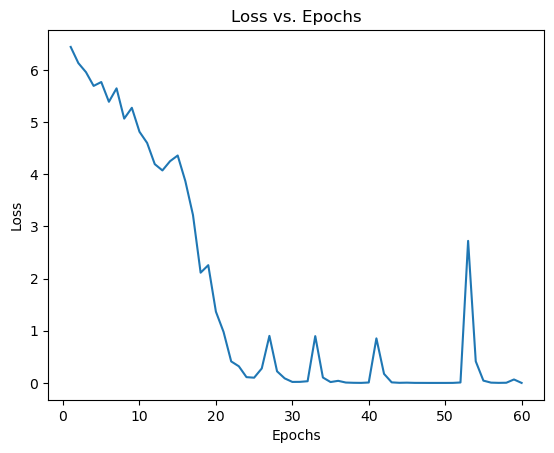

In [34]:
# print(torch.cuda.device_count())
import matplotlib.pyplot as plt

# Assuming you have a list of loss values named 'loss_list'
epochs = range(1, len(loss_list) + 1)  # Assuming epochs start from 1

# Create the plot
plt.plot(epochs, loss_list)

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

# Show the plot
plt.show()

In [37]:
# STAGING FOR RESNET-36

import tqdm

num_classes = len(train_subset.classes)
# THE FUNDAMENTAL DIFFERENCE IS HERE
# THIS IS BASED ON THE INTUITION THAT THE LATER LAYERS OF THE RESNET
# ARE DESIGNED TO IDENTIFY MORE HIGH LEVEL FEATURES, SO IF I INCLUDE AN ADDITIONAL BLOCK OVER HERE
# THEN IT MIGHT IMPROVE THINGS AT THIS END, WE CAN EXPERIMENT WHAT WORKS BEST HERE BTW, MAYBE MOVE THINGS AROUND AND SEE WHAT WORKS
model = ResNet(ResidualBlock, [3, 4, 6, 4], outputNodes=num_classes)
model = torch.nn.DataParallel(model)
model = model.to(device)

num_epochs = 60
batch_size = 64
learning_rate = 0.001

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_list2 = []
total_time = 0
for epoch in range(num_epochs):
    time_b4_train = time.time()
    for images, labels in train_loader:
      #Move tensors to the configured device

      # print(type(images))
      # print(type(labels))
      images = images.to(device)
      labels = labels.to(device)

      #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      #Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # del images, labels, outputs
      # torch.cuda.empty_cache()
      # gc.collect()
    time_after_train = time.time()
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    loss_list2.append(loss.item())
    total_time += (time_after_train - time_b4_train)

    if epoch % 10 == 0:
      #Validation
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in tqdm.tqdm(val_loader):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                # del images, labels, outputs
    
        print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

        print(f"Training time: {total_time}")

print(f"Training time: {total_time}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))



Epoch [1/60], Loss: 6.5063


100%|██████████| 102/102 [00:09<00:00, 10.22it/s]

Accuracy of the network on the validation images: 0.2923076923076923 %
Training time: 26.880463361740112


Epoch [2/60], Loss: 6.1192
Epoch [3/60], Loss: 6.2267
Epoch [4/60], Loss: 5.9018
Epoch [5/60], Loss: 5.6701
Epoch [6/60], Loss: 5.5239
Epoch [7/60], Loss: 5.3146
Epoch [8/60], Loss: 5.0676
Epoch [9/60], Loss: 4.8363
Epoch [10/60], Loss: 5.1479
Epoch [11/60], Loss: 4.4534


100%|██████████| 102/102 [00:10<00:00, 10.10it/s]

Accuracy of the network on the validation images: 3.0923076923076924 %
Training time: 256.83274602890015


Epoch [12/60], Loss: 4.3531
Epoch [13/60], Loss: 4.3376
Epoch [14/60], Loss: 3.6924
Epoch [15/60], Loss: 3.0878
Epoch [16/60], Loss: 2.8158
Epoch [17/60], Loss: 2.3836
Epoch [18/60], Loss: 1.2945
Epoch [19/60], Loss: 0.9343
Epoch [20/60], Loss: 0.8472
Epoch [21/60], Loss: 0.2881


100%|██████████| 102/102 [00:10<00:00, 10.13it/s]

Accuracy of the network on the validation images: 4.092307692307692 %
Training time: 483.8877878189087


Epoch [22/60], Loss: 0.1443
Epoch [23/60], Loss: 0.1846
Epoch [24/60], Loss: 0.2036
Epoch [25/60], Loss: 0.4578
Epoch [26/60], Loss: 0.4041
Epoch [27/60], Loss: 0.0646
Epoch [28/60], Loss: 0.0683
Epoch [29/60], Loss: 0.0346
Epoch [30/60], Loss: 0.0223
Epoch [31/60], Loss: 0.2282


100%|██████████| 102/102 [00:09<00:00, 10.36it/s]

Accuracy of the network on the validation images: 3.8 %
Training time: 710.1710810661316


Epoch [32/60], Loss: 0.1049
Epoch [33/60], Loss: 0.6866
Epoch [34/60], Loss: 0.1921
Epoch [35/60], Loss: 0.0803
Epoch [36/60], Loss: 0.1102
Epoch [37/60], Loss: 0.0037
Epoch [38/60], Loss: 0.0370
Epoch [39/60], Loss: 0.1318
Epoch [40/60], Loss: 0.1546
Epoch [41/60], Loss: 0.3049


100%|██████████| 102/102 [00:09<00:00, 10.60it/s]

Accuracy of the network on the validation images: 3.3846153846153846 %
Training time: 937.7921855449677


Epoch [42/60], Loss: 0.0245
Epoch [43/60], Loss: 0.0248
Epoch [44/60], Loss: 0.0028
Epoch [45/60], Loss: 0.0014
Epoch [46/60], Loss: 0.0014
Epoch [47/60], Loss: 0.0057
Epoch [48/60], Loss: 0.6889
Epoch [49/60], Loss: 0.1644
Epoch [50/60], Loss: 0.0457
Epoch [51/60], Loss: 0.0035


100%|██████████| 102/102 [00:10<00:00, 10.16it/s]

Accuracy of the network on the validation images: 3.6769230769230767 %
Training time: 1165.2126729488373


Epoch [52/60], Loss: 0.0027
Epoch [53/60], Loss: 0.0249
Epoch [54/60], Loss: 0.0024
Epoch [55/60], Loss: 0.0185
Epoch [56/60], Loss: 0.6854
Epoch [57/60], Loss: 0.0542
Epoch [58/60], Loss: 0.0046
Epoch [59/60], Loss: 0.0271
Epoch [60/60], Loss: 0.0038
Training time: 1368.3809196949005


100%|██████████| 41/41 [00:04<00:00,  8.92it/s]

Accuracy of the network on the 10000 test images: 5.115384615384615 %


In [ ]:
# Custom Stunted ReLU activation function
class StuntedReLU(nn.Module):
    def __init__(self):
        super(StuntedReLU, self).__init__()

    def forward(self, x):
        return torch.where(x > 0.1, x, torch.tensor(0.0, device=x.device))

num_classes = len(train_subset.classes)
# THE FUNDAMENTAL DIFFERENCE IS HERE
# THIS IS BASED ON THE INTUITION THAT THE LATER LAYERS OF THE RESNET
# ARE DESIGNED TO IDENTIFY MORE HIGH LEVEL FEATURES, SO IF I INCLUDE AN ADDITIONAL BLOCK OVER HERE
# THEN IT MIGHT IMPROVE THINGS AT THIS END, WE CAN EXPERIMENT WHAT WORKS BEST HERE BTW, MAYBE MOVE THINGS AROUND AND SEE WHAT WORKS
model = ResNet(ResidualBlock, [3, 4, 6, 4], outputNodes=1000, activation=StuntedReLU())

num_epochs = 60
batch_size = 64
learning_rate = 0.001

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_list2 = []
total_time = 0
for epoch in range(num_epochs):
    time_b4_train = time.time()
    for images, labels in train_loader:
      #Move tensors to the configured device

      # print(type(images))
      # print(type(labels))
      images = images.to(device)
      labels = labels.to(device)

      #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      #Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # del images, labels, outputs
      # torch.cuda.empty_cache()
      # gc.collect()
    time_after_train = time.time()
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    loss_list2.append(loss.item())
    total_time += (time_after_train - time_b4_train)

    if epoch % 10 == 0:
      #Validation
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in tqdm.tqdm(val_loader):
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                # del images, labels, outputs
    
        print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

        print(f"Training time: {total_time}")

print(f"Training time: {total_time}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))




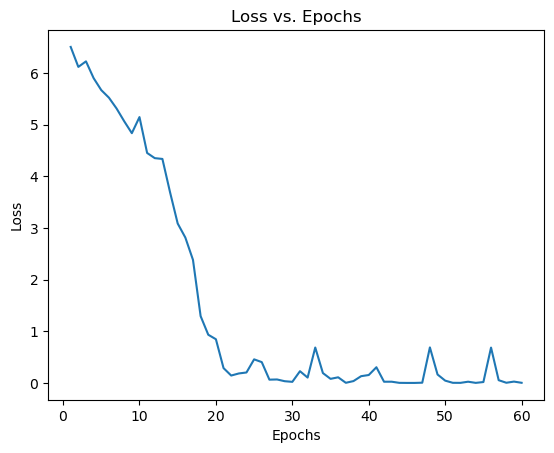

In [38]:
# print(torch.cuda.device_count())
import matplotlib.pyplot as plt

# Assuming you have a list of loss values named 'loss_list'
epochs = range(1, len(loss_list2) + 1)  # Assuming epochs start from 1

# Create the plot
plt.plot(epochs, loss_list2)

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

# Show the plot
plt.show()

In [4]:
# full dataset

# STAGING FOR RESNET-36

import tqdm
import time

num_classes = len(full_dataset.classes)
# THE FUNDAMENTAL DIFFERENCE IS HERE
# THIS IS BASED ON THE INTUITION THAT THE LATER LAYERS OF THE RESNET
# ARE DESIGNED TO IDENTIFY MORE HIGH LEVEL FEATURES, SO IF I INCLUDE AN ADDITIONAL BLOCK OVER HERE
# THEN IT MIGHT IMPROVE THINGS AT THIS END, WE CAN EXPERIMENT WHAT WORKS BEST HERE BTW, MAYBE MOVE THINGS AROUND AND SEE WHAT WORKS
model = ResNet(ResidualBlock, [3, 4, 6, 4], outputNodes=1000)
model = torch.nn.DataParallel(model)
model = model.to(device)

num_epochs = 10
learning_rate = 0.001

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

loss_list2 = []
total_time = 0
for epoch in range(num_epochs):
    time_b4_train = time.time()
    for images, labels in tqdm.tqdm(train_loader):
      #Move tensors to the configured device
      images = images.to(device)
      labels = labels.to(device)

      #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      #Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    time_after_train = time.time()
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    loss_list2.append(loss.item())
    total_time += (time_after_train - time_b4_train)

    #Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in tqdm.tqdm(val_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # del images, labels, outputs

    print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

    print(f"Training time: {total_time}")

print(f"Training time: {total_time}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))




100%|██████████| 5855/5855 [28:56<00:00,  3.37it/s] 


Epoch [1/2], Loss: 7.9036


100%|██████████| 326/326 [01:07<00:00,  4.84it/s]


Accuracy of the network on the validation images: 28.838762371480733 %
Training time: 1736.5223181247711


100%|██████████| 5855/5855 [17:04<00:00,  5.72it/s]


Epoch [2/2], Loss: 11.0594


100%|██████████| 326/326 [00:58<00:00,  5.57it/s]


Accuracy of the network on the validation images: 40.17728452003459 %
Training time: 2760.561842441559
Training time: 2760.561842441559


100%|██████████| 326/326 [01:07<00:00,  4.81it/s]

Accuracy of the network on the 10000 test images: 40.28058037859133 %


In [16]:
import torchvision
from torchsummary import summary

model = torchvision.models.resnet34(weights="DEFAULT", progress=True).to("cuda") 
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [22]:
# RESNET34 (PRETRAINED) - FULL DATASET

import torch
import torchvision
import tqdm

model = torchvision.models.resnet34(weights="DEFAULT", progress=True)

model = torch.nn.DataParallel(model)
model = model.to(device)

num_epochs = 7
learning_rate = 0.001

#Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

# loss_list2 = []
# total_time = 0
# for epoch in range(num_epochs):
#     time_b4_train = time.time()
#     for images, labels in tqdm.tqdm(train_loader):
#       #Move tensors to the configured device
#       images = images.to(device)
#       labels = labels.to(device)

#       #Forward pass
#       outputs = model(images)
#       loss = criterion(outputs, labels)

#       #Backward and optimize
#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()

#     time_after_train = time.time()
#     print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
#     loss_list2.append(loss.item())
#     total_time += (time_after_train - time_b4_train)

#     #Validation
#     if epoch % 3 == 0:
#         with torch.no_grad():
#             correct = 0
#             total = 0
#             for images, labels in tqdm.tqdm(val_loader):
#                 images = images.to(device)
#                 labels = labels.to(device)
#                 outputs = model(images)
#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()
    
#         print('Accuracy of the network on the validation images: {} %'.format(100 * correct / total))

#     print(f"Training time: {total_time}")

# print(f"Training time: {total_time}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm.tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the test images: {} %'.format(100 * correct / total))



100%|██████████| 326/326 [01:17<00:00,  4.22it/s]

Accuracy of the network on the test images: 0.019217834150091286 %
